# Процесс Винера

In [1]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-

## Моделирование процесса Винера

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
T = 1.0
N = 500.0
dt = T/N

mu = 0.0
sigma = np.sqrt(dt)

t = np.arange(0.0, T+dt, dt)
dW = np.random.normal(mu,sigma,len(t))

In [4]:
W = np.cumsum(dW)

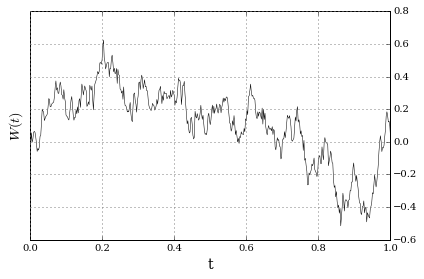

In [5]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)

#ax1.set_title("Дискретная броуновская траектория", fontsize=14)
ax1.set_xlabel("t", fontsize=14)
ax1.set_ylabel("$W(t)$", fontsize=14)

ax1.yaxis.tick_right()
ax1.plot(t,W, lw=0.5, color='k')
fig1.tight_layout()
#fig1.savefig("Winer_process.pdf", format='pdf', dpi=300)

## Функция от винеровского процесса

In [6]:
M = 1000 # Число симуляций

mu = 0.0
sigma = np.sqrt(dt)

t = np.arange(0.0, T+dt, dt)
dW = np.random.normal(mu,sigma,size = (M, len(t)))

Вычисляем функцию 
$$U(W(t)) = \exp(t + 0.5W(t))$$

In [7]:
W = np.cumsum(dW,1)
U = np.exp(np.tile(t,(M,1)) + 0.5*W)

In [8]:
mU = np.mean(U,0) # Вычисляем от всех испытаний

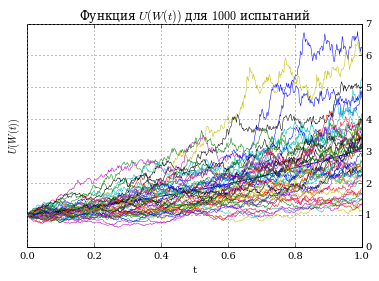

In [9]:
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(1,1,1)

ax2.set_title("Функция $U(W(t))$ для ${0}$ испытаний".format(M))
ax2.set_xlabel("t")
ax2.set_ylabel("$U(W(t))$")

ax2.yaxis.tick_right()

ax2.plot(t,mU, lw=1.0)
for i in np.random.random_integers(0,M,50):
    ax2.plot(t,U[i,:], linestyle='-', lw=0.5, label="{0}".format(i))
    
#ax2.legend(ncol=5)